#### Maestría en Inteligencia de Negocios y Análisis de Datos
#### Segundo Ciclo, Abril 2023
#### Proyecto Final -  Statistical Learning L
#### Marvin Chávez 08105031
#### Marvin Cordova 22007865

#### Notebook #1: con Análisis Exploratorio con tablas y gráficas de sus datos.

##### Objetivo central es identificar y clasificar a los clientes que están en riesgo de incumplimiento de sus préstamos. Para alcanzar esta meta, se ha empleado un conjunto de datos con 148,471 registros y 34 columnas que contienen información relevante sobre préstamos y perfiles de los clientes. 
##### En este Notebook se encontrara con la exploracion, seleccion e ingeniera de caracteristicas. y servira para la navegacion en general.

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("LoanDefault2.csv",sep=";")
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,25159,2019,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,...,EQUI,700,EXP,35-44,to_inst,NaN,south,direct,1,NaN
1,25249,2019,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,...,EQUI,597,EXP,65-74,to_inst,NaN,south,direct,1,NaN
2,25394,2019,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,...,EQUI,730,EXP,>74,to_inst,NaN,south,direct,1,NaN
3,26024,2019,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,...,EQUI,657,EXP,55-64,to_inst,NaN,south,direct,1,NaN
4,27400,2019,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,...,EQUI,507,EXP,65-74,to_inst,NaN,south,direct,1,NaN


### 1. Análisis de Datos

#### 1.1 Extraer tipos de columnas: numéricas continuas, numéricas discretas y categóticas

In [3]:
def getDateColTypes(df):
       categoricas = []
       continuas = []
       discretas = []

       for colName in df.columns:
              if (df[colName].dtype == 'O'):
                     categoricas.append(colName)
              else:
                     if((df[colName].dtype == 'int64') or (df[colName].dtypes == 'float64')):
                            if(len(df[colName]) <= 30):
                                   discretas.append(colName)
                            else:
                                   continuas.append(colName)
       return discretas, continuas, categoricas

In [4]:
discretas, continuas, categoricas = getDateColTypes(df)

In [5]:
discretas

[]

In [6]:
continuas

['ID',
 'year',
 'loan_amount',
 'rate_of_interest',
 'Interest_rate_spread',
 'Upfront_charges',
 'term',
 'property_value',
 'income',
 'Credit_Score',
 'LTV',
 'Status',
 'dtir1']

In [7]:
categoricas

['loan_limit',
 'Gender',
 'approv_in_adv',
 'loan_type',
 'loan_purpose',
 'Credit_Worthiness',
 'open_credit',
 'business_or_commercial',
 'Neg_ammortization',
 'interest_only',
 'lump_sum_payment',
 'construction_type',
 'occupancy_type',
 'Secured_by',
 'total_units',
 'credit_type',
 'co-applicant_credit_type',
 'age',
 'submission_of_application',
 'Region',
 'Security_Type']

In [8]:
#Se remueven de las variables continuas la columna objetivo, el año y el ID 
continuas.remove('Status')
continuas.remove('ID')
continuas.remove('year')

In [9]:
def plotCatColumn_vrs_Target(df, colname, target):
       plt.figure(figsize=(10, 5))
       plot = sns.countplot(x=df[colname], hue=df[target])
       plt.title(f'{colname}  vrs {target}')

       for p in plot.patches:
              plt.annotate(p.get_height(), (p.get_x() + p.get_width()/3, p.get_height() + 50))

       plt.show()

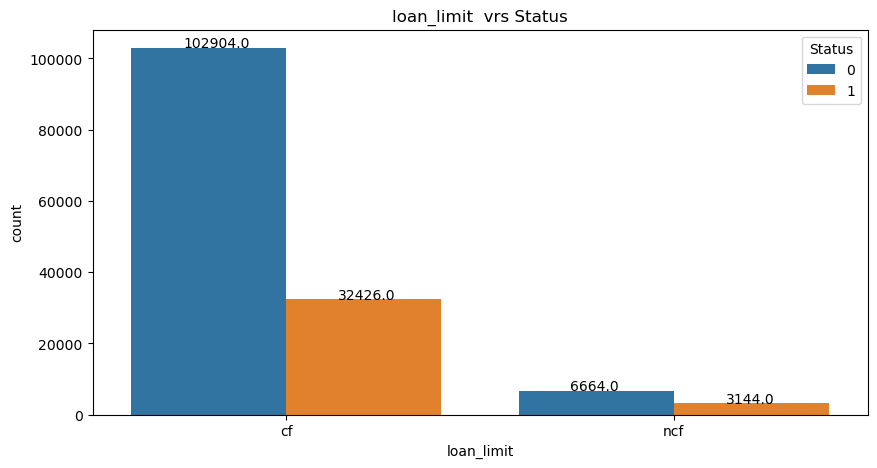

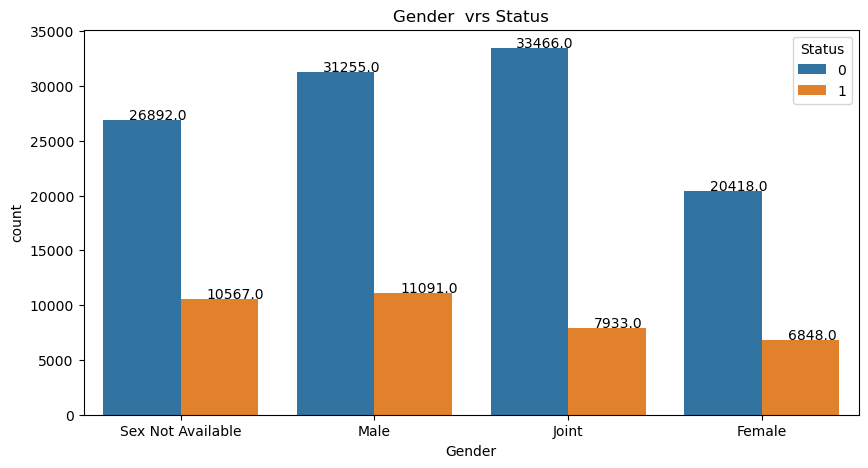

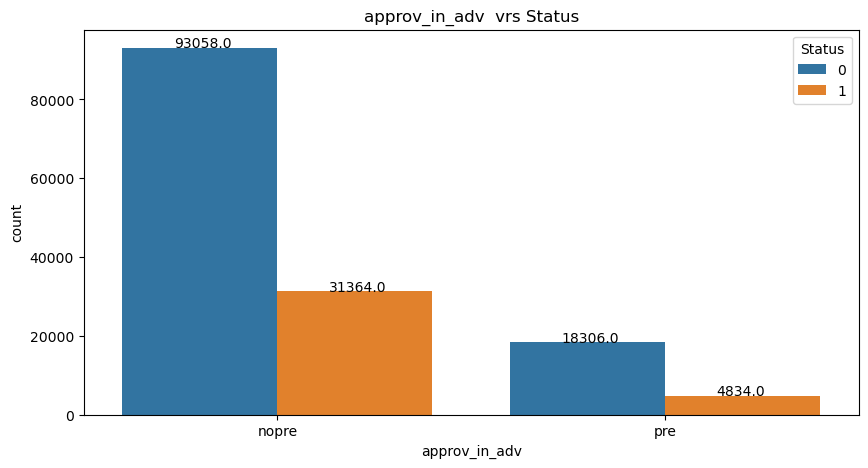

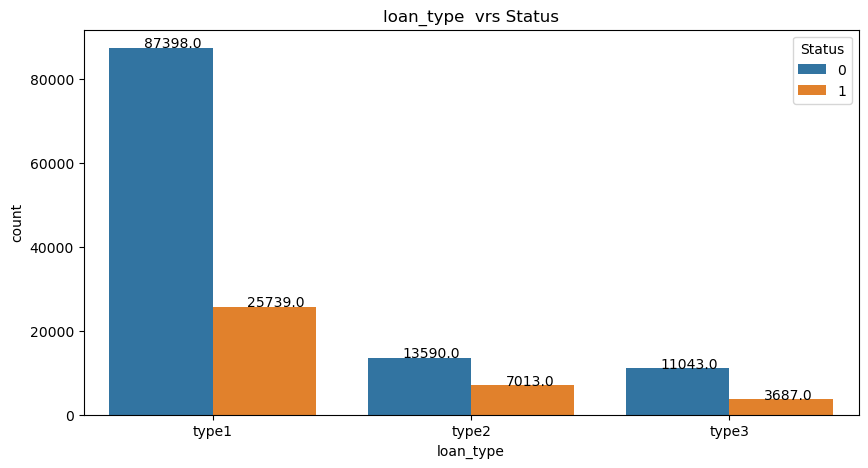

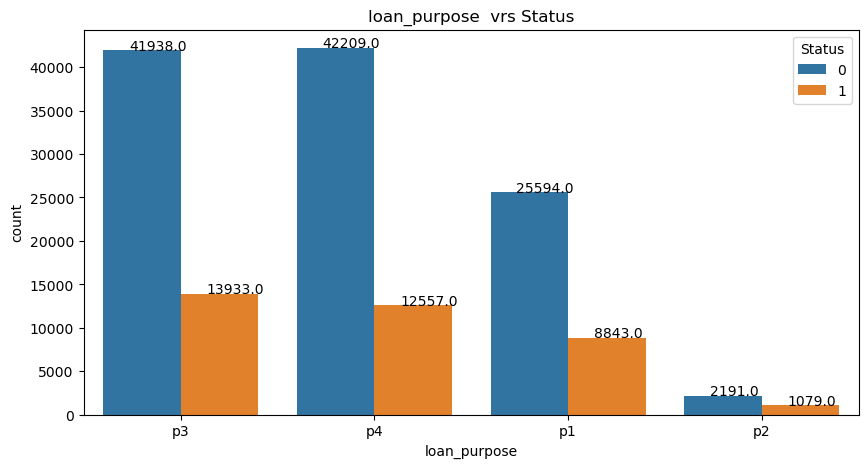

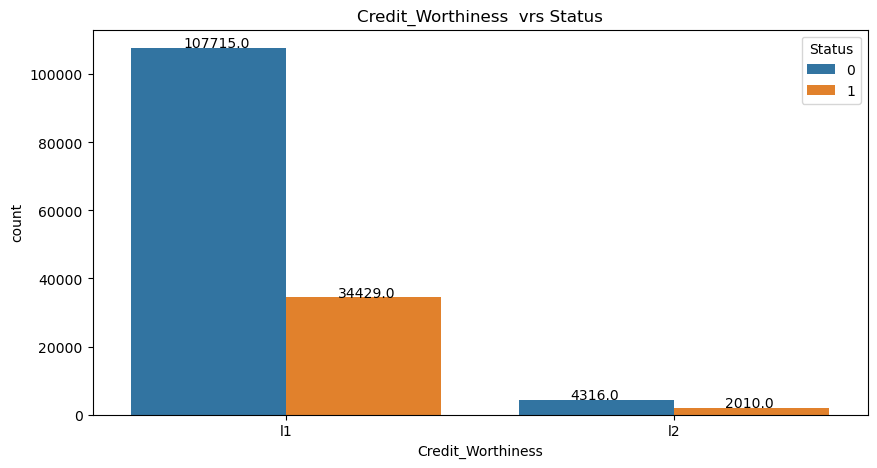

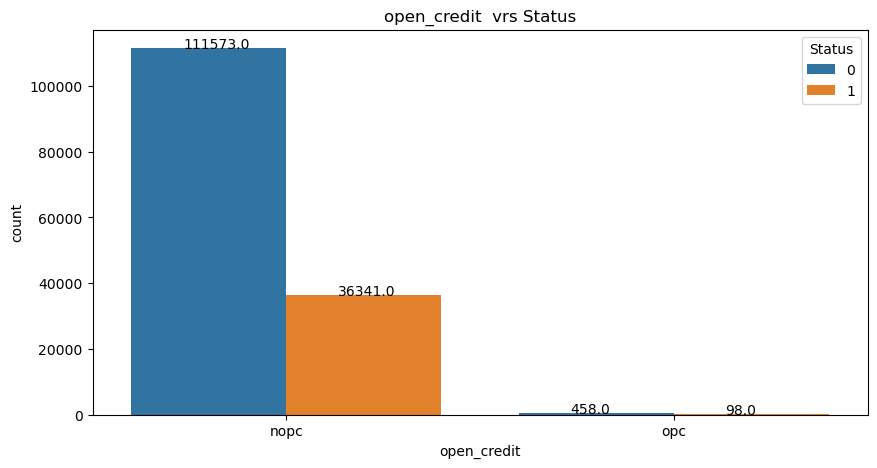

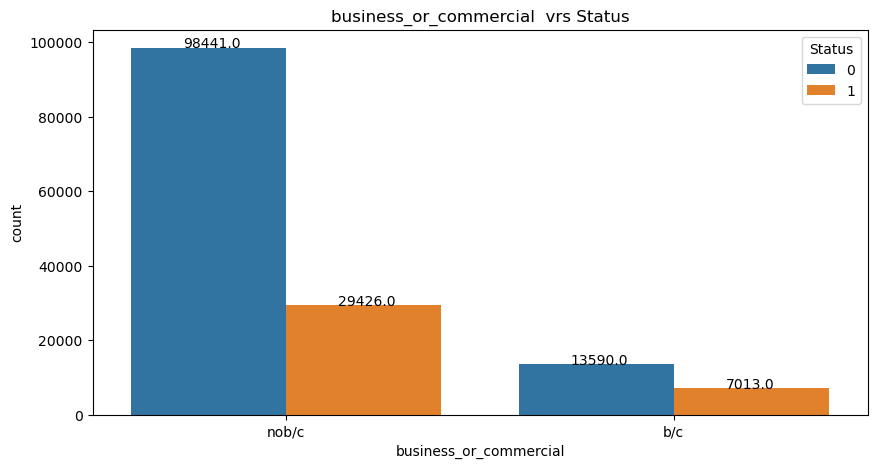

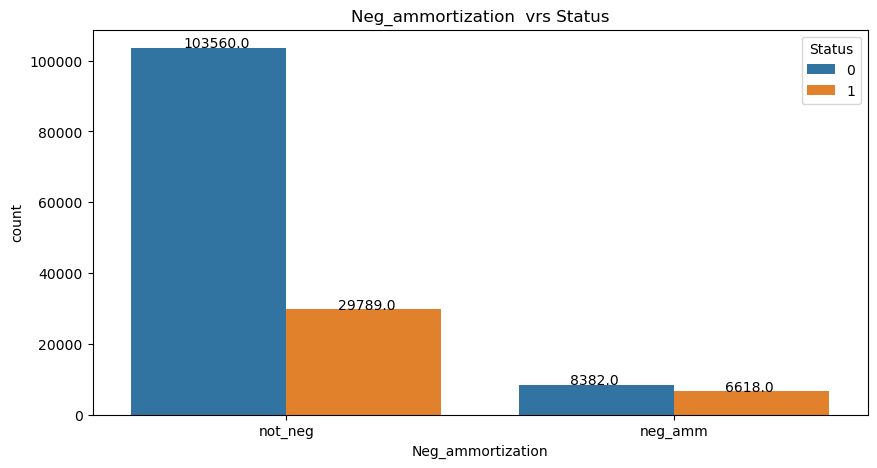

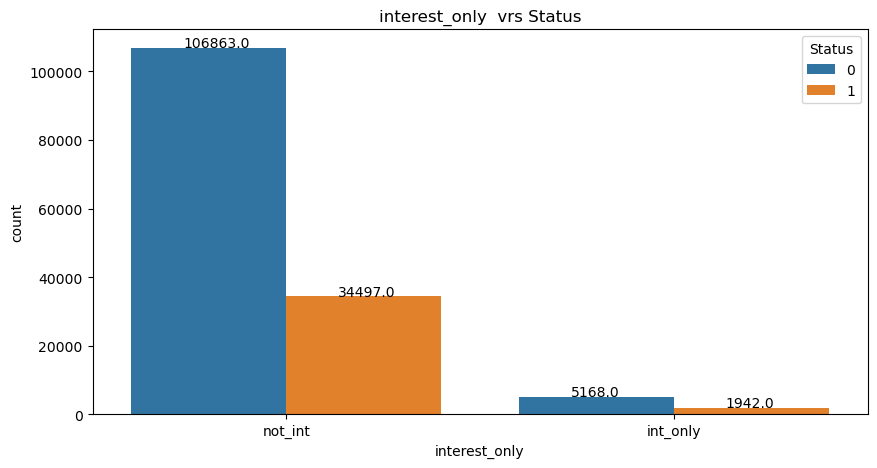

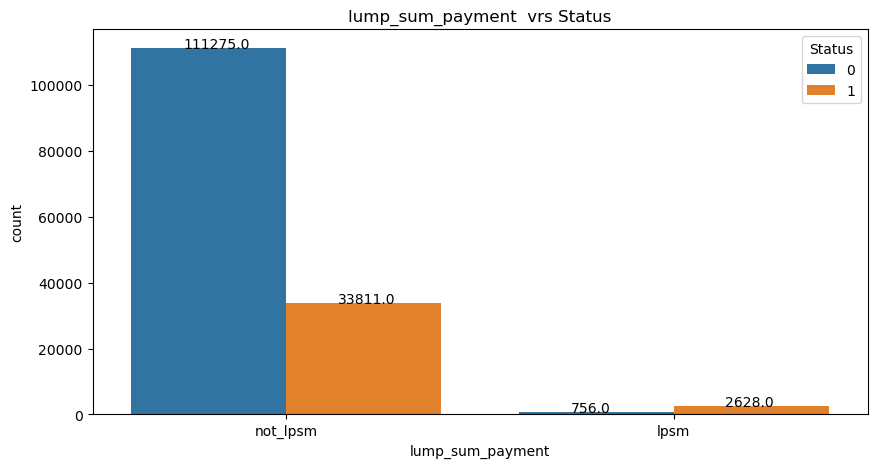

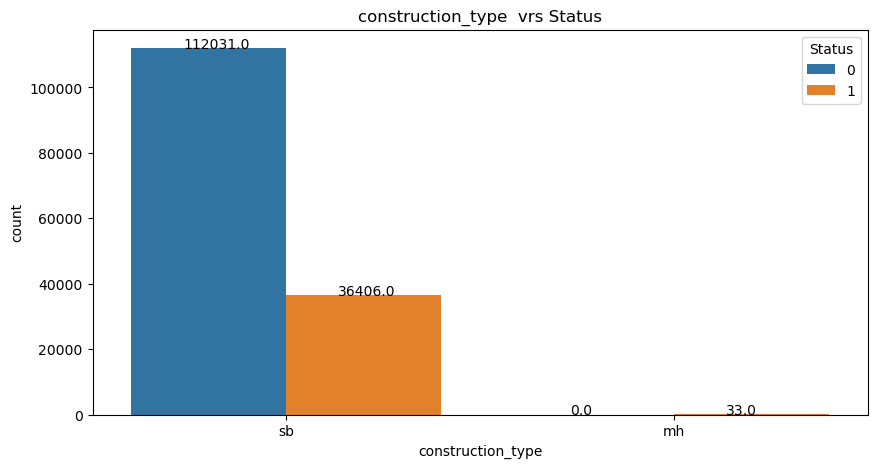

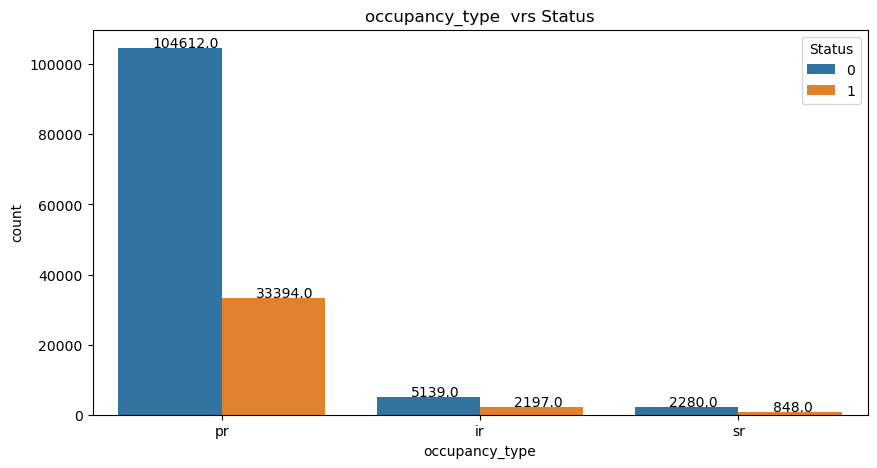

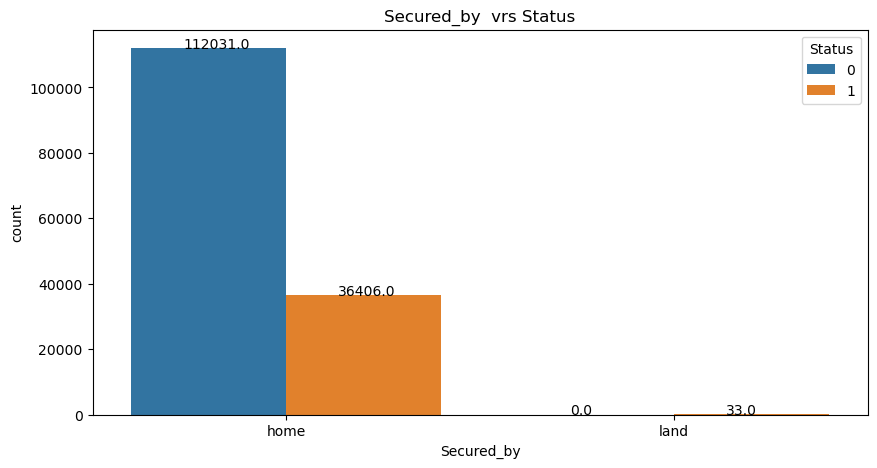

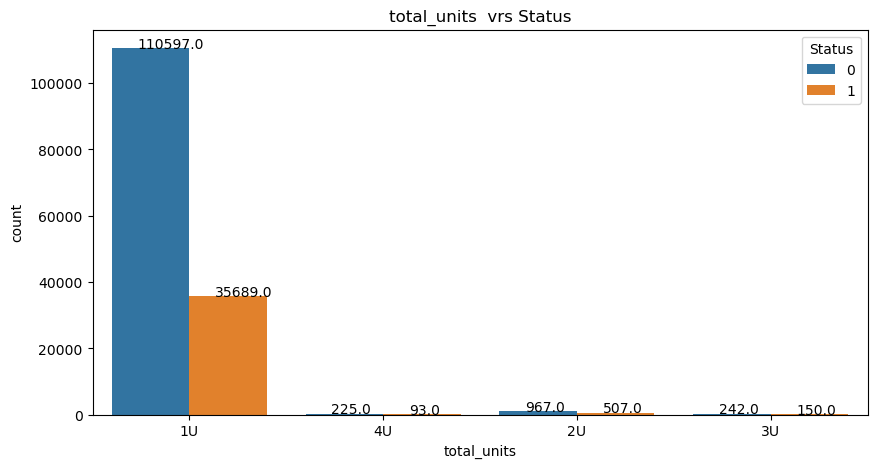

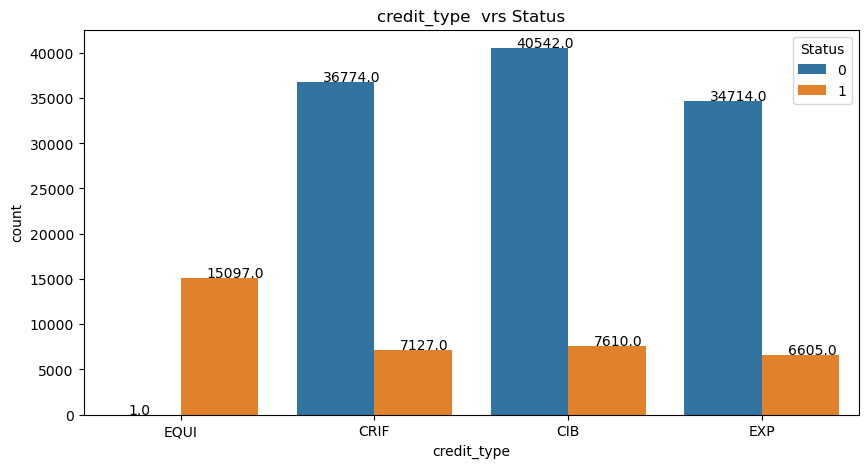

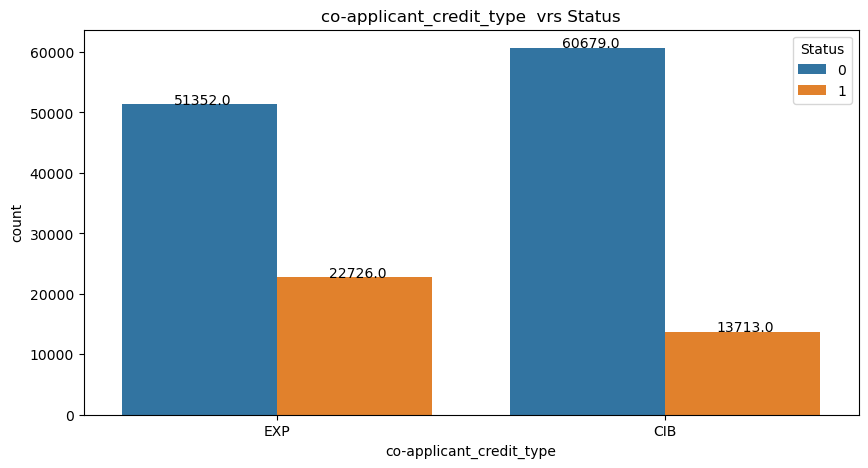

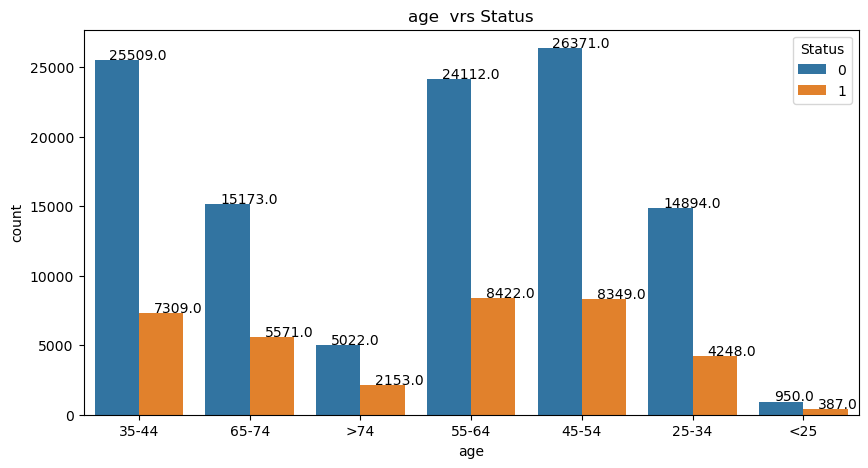

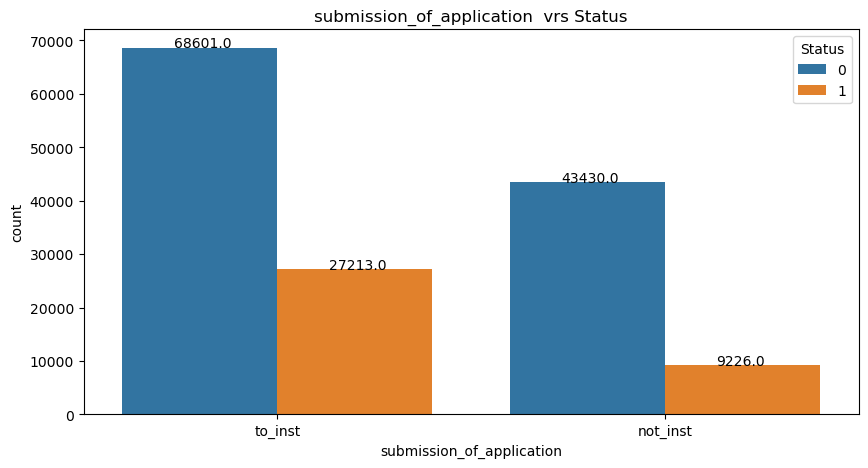

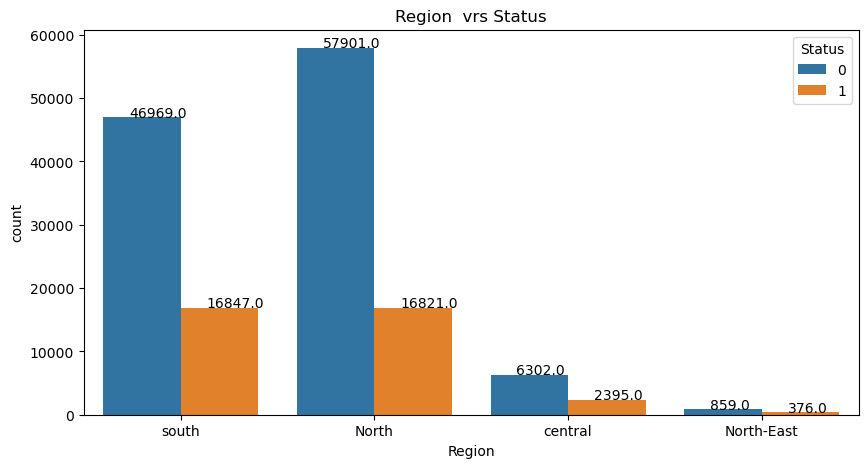

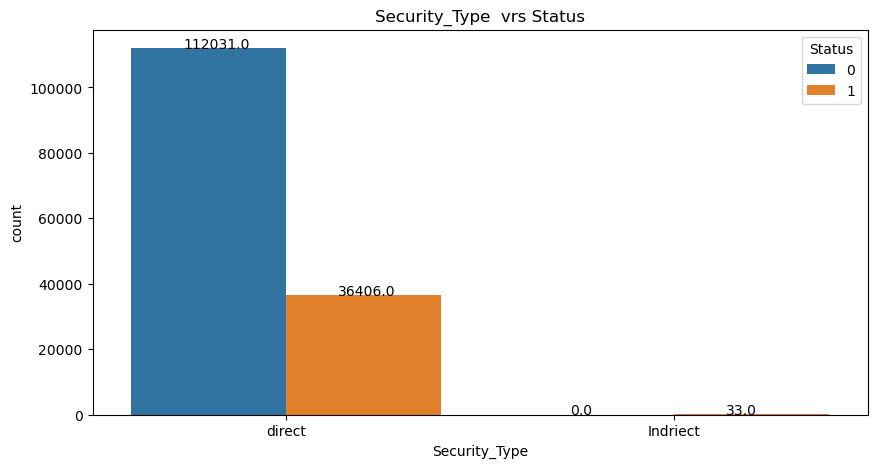

In [10]:
for catCol in categoricas:
       plotCatColumn_vrs_Target(df, catCol, 'Status')

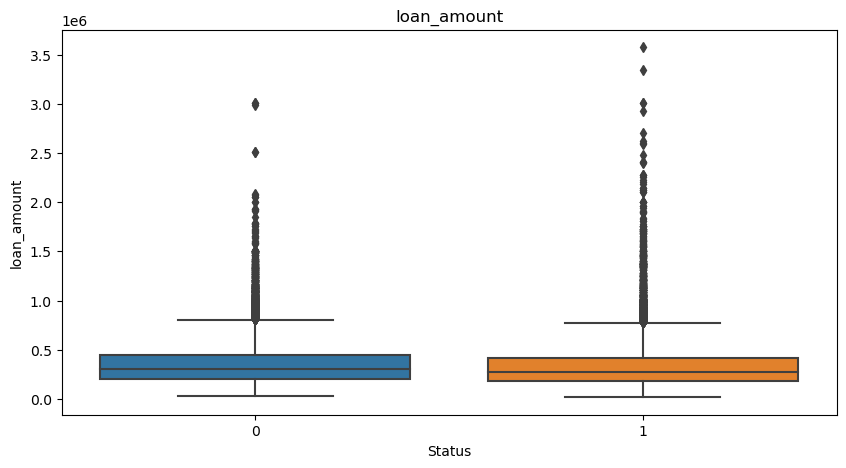

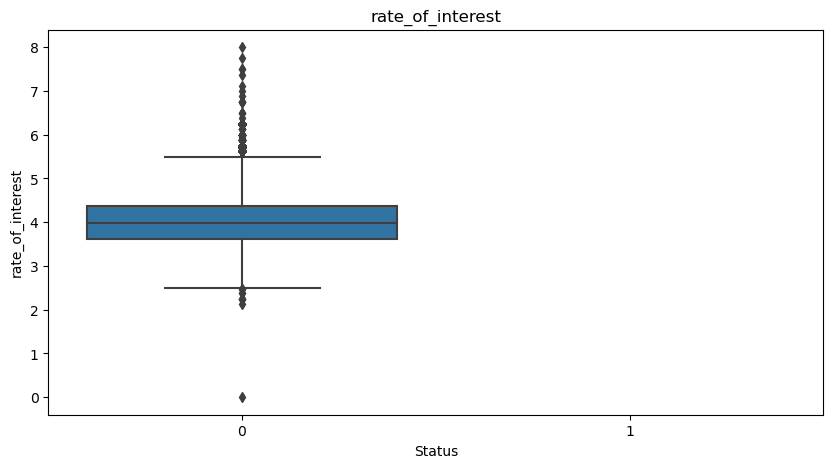

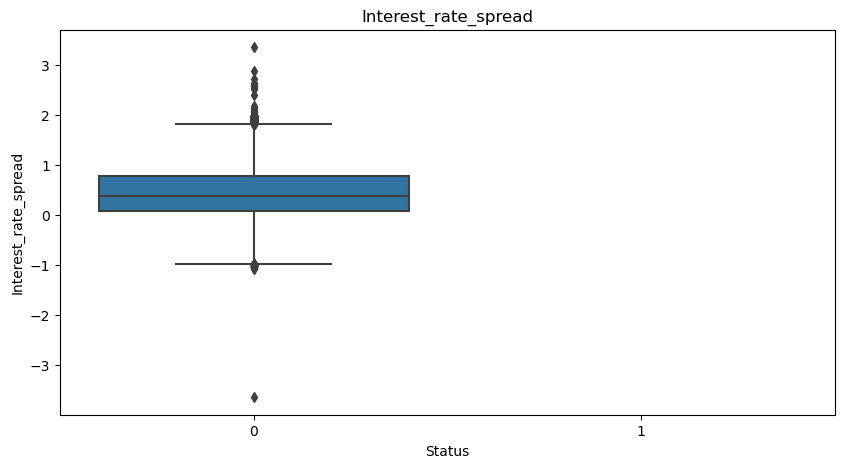

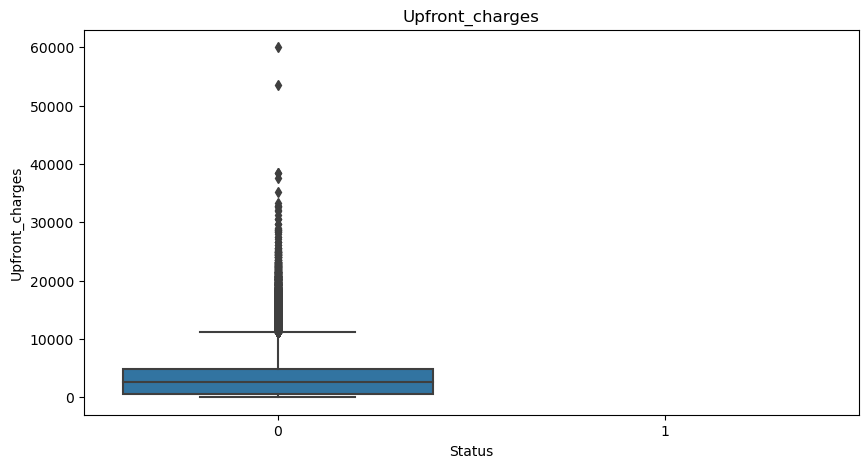

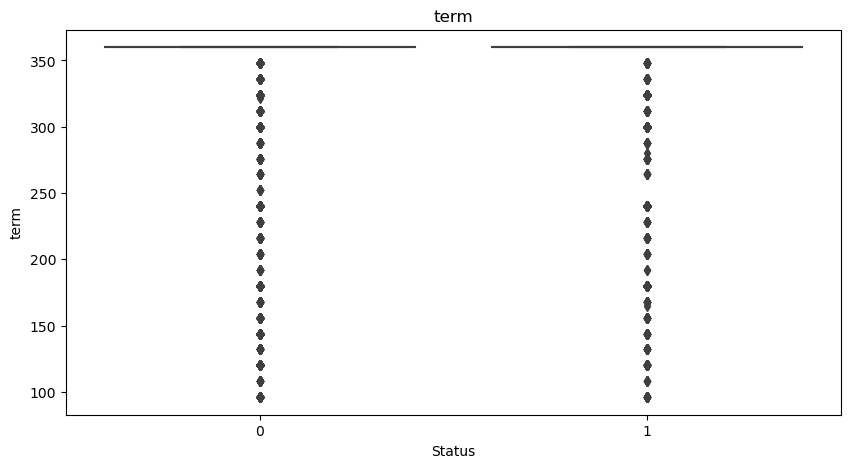

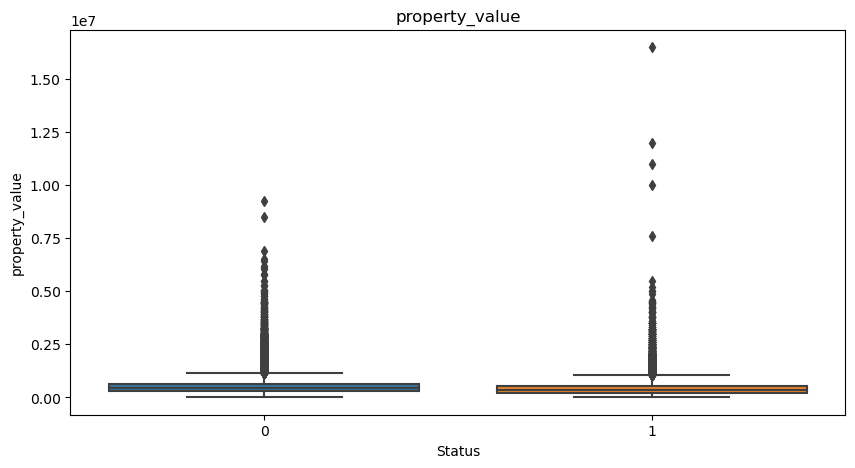

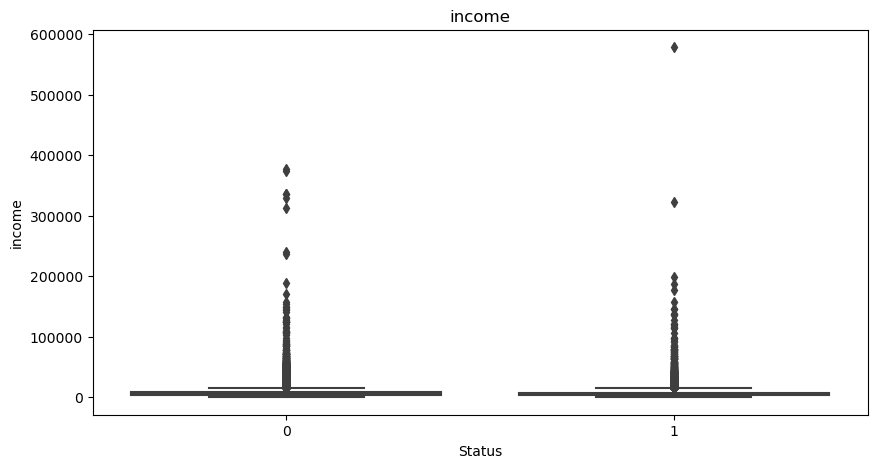

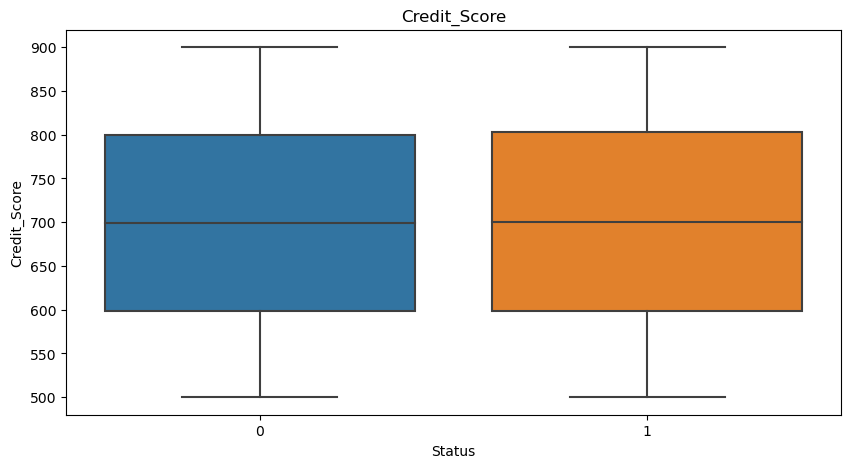

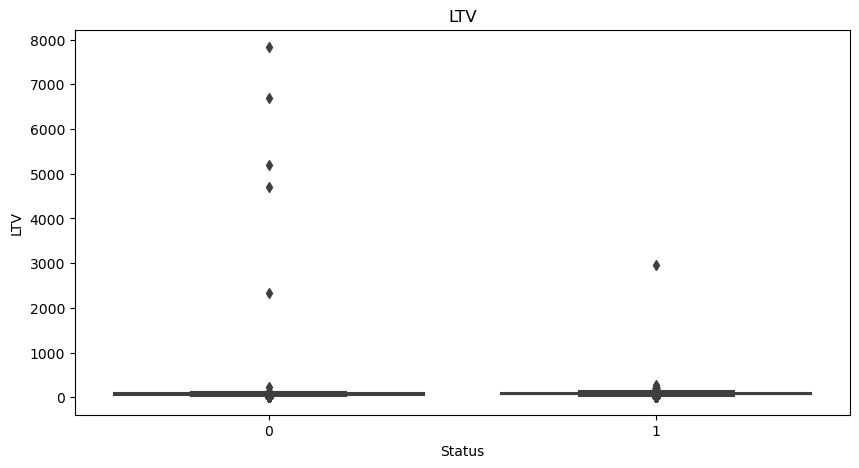

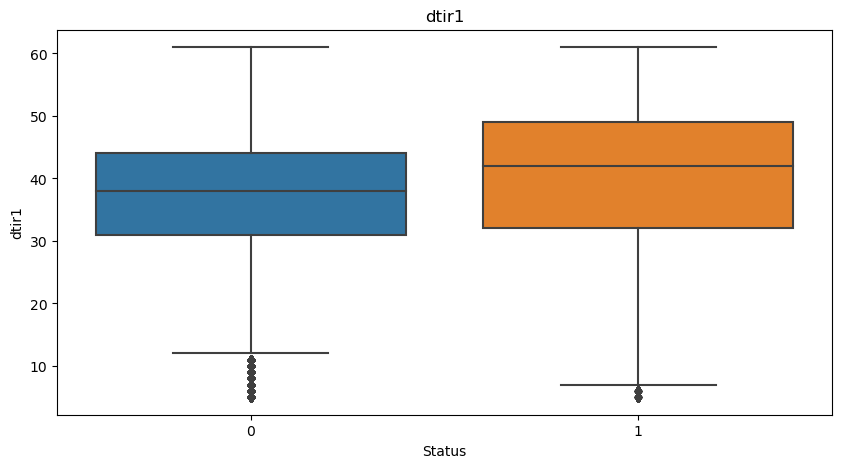

In [11]:
for colName in continuas:
       plt.figure(figsize=(10, 5))
       sns.boxplot(x=df['Status'], y=df[colName])
       plt.title(colName)
       plt.show()

### 2. Balanceo de Categorías en el Target

In [12]:
df['Status'].value_counts()

0    112031
1     36439
Name: Status, dtype: int64

In [13]:
df_aldia = df[df['Status'] == 0]
df_aldia.shape

(112031, 34)

In [14]:
df_incumplimiento = df[df['Status'] == 1]
df_incumplimiento.shape

(36439, 34)

In [15]:
cantidadAlDia = 2*df_incumplimiento.shape[0]
cantidadAlDia

72878

In [16]:
df_aldia = df_aldia.sample(n=cantidadAlDia, random_state=2023)

In [17]:
df = pd.concat([df_incumplimiento, df_aldia])
df.shape

(109317, 34)

### 3. Ingeniería de Características

##### 3.1 Imputación de Variables

In [18]:

df.isnull().mean() #porcentaje

ID                           0.000000
year                         0.000000
loan_limit                   0.022513
Gender                       0.000000
approv_in_adv                0.006019
loan_type                    0.000000
loan_purpose                 0.000887
Credit_Worthiness            0.000000
open_credit                  0.000000
business_or_commercial       0.000000
loan_amount                  0.000000
rate_of_interest             0.333333
Interest_rate_spread         0.333333
Upfront_charges              0.352050
term                         0.000293
Neg_ammortization            0.000787
interest_only                0.000000
lump_sum_payment             0.000000
property_value               0.138103
construction_type            0.000000
occupancy_type               0.000000
Secured_by                   0.000000
total_units                  0.000000
income                       0.056807
credit_type                  0.000000
Credit_Score                 0.000000
co-applicant

In [19]:
cols_con_na = [col for col in df.columns if (df[col].isnull().mean() > 0)]
cols_con_na

['loan_limit',
 'approv_in_adv',
 'loan_purpose',
 'rate_of_interest',
 'Interest_rate_spread',
 'Upfront_charges',
 'term',
 'Neg_ammortization',
 'property_value',
 'income',
 'LTV',
 'dtir1']

In [20]:
df[cols_con_na].dtypes

loan_limit               object
approv_in_adv            object
loan_purpose             object
rate_of_interest        float64
Interest_rate_spread    float64
Upfront_charges         float64
term                    float64
Neg_ammortization        object
property_value          float64
income                  float64
LTV                     float64
dtir1                   float64
dtype: object

In [21]:
prop_nan_per_col = df[cols_con_na].isnull().mean()
prop_nan_per_col

loan_limit              0.022513
approv_in_adv           0.006019
loan_purpose            0.000887
rate_of_interest        0.333333
Interest_rate_spread    0.333333
Upfront_charges         0.352050
term                    0.000293
Neg_ammortization       0.000787
property_value          0.138103
income                  0.056807
LTV                     0.138103
dtir1                   0.193995
dtype: float64

#####  Se procede a tratar de rescatar las variables que están por debajo de o igual a 0.05


In [22]:
cols_a_imputar = [col for col in cols_con_na if (df[col].isnull().mean() <= 0.05)]
cols_a_imputar

['loan_limit', 'approv_in_adv', 'loan_purpose', 'term', 'Neg_ammortization']

In [23]:
df[cols_a_imputar].dtypes

loan_limit            object
approv_in_adv         object
loan_purpose          object
term                 float64
Neg_ammortization     object
dtype: object

##### Imputación Continua

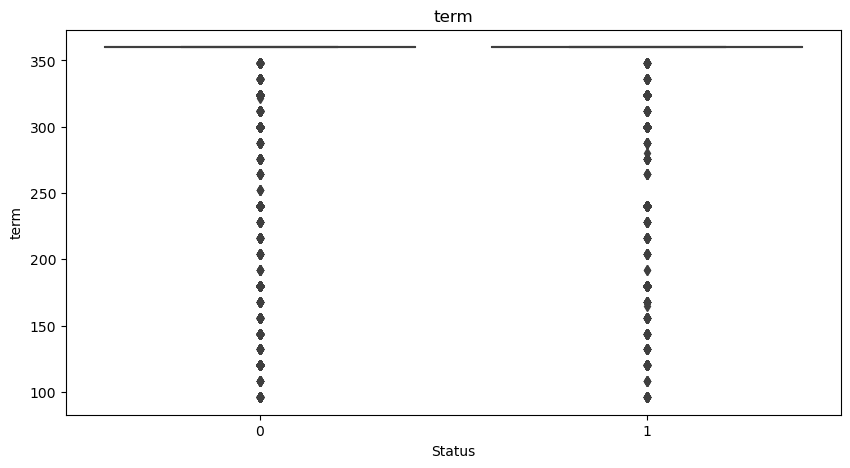

In [24]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Status'], y=df['term'])
plt.title('term')
plt.show()

#####  Debido a que la variable term se examinó en la exploración que no aporta de una manera significativa se descarta la variable. La concentracion de los datos esta al mismo nivel. 

##### Imputación Categórica

In [25]:
dataset_cat_missing = df[['Status','loan_limit',
 'approv_in_adv',
 'loan_purpose',
 'Neg_ammortization']]
dataset_cat_missing.head()

,Status,loan_limit,approv_in_adv,loan_purpose,Neg_ammortization
0,1,cf,nopre,p3,not_neg
1,1,cf,nopre,p3,not_neg
2,1,cf,nopre,p3,not_neg
3,1,cf,nopre,p3,not_neg
4,1,cf,nopre,p3,not_neg


In [26]:
dataset_cat_missing.isnull().mean()

Status               0.000000
loan_limit           0.022513
approv_in_adv        0.006019
loan_purpose         0.000887
Neg_ammortization    0.000787
dtype: float64

In [27]:
for columna in ['loan_limit', 'approv_in_adv','loan_purpose','Neg_ammortization']:
    result = dataset_cat_missing[columna].value_counts() / len(dataset_cat_missing)
    print(result)

cf     0.908047
ncf    0.069440
Name: loan_limit, dtype: float64
nopre    0.839824
pre      0.154157
Name: approv_in_adv, dtype: float64
p3    0.378102
p4    0.366119
p1    0.231913
p2    0.022979
Name: loan_purpose, dtype: float64
not_neg    0.888828
neg_amm    0.110385
Name: Neg_ammortization, dtype: float64


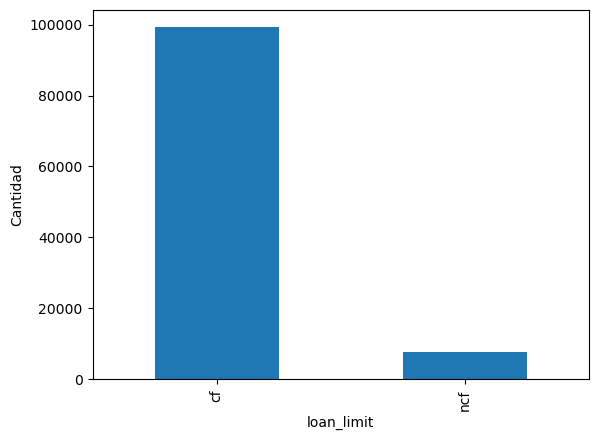

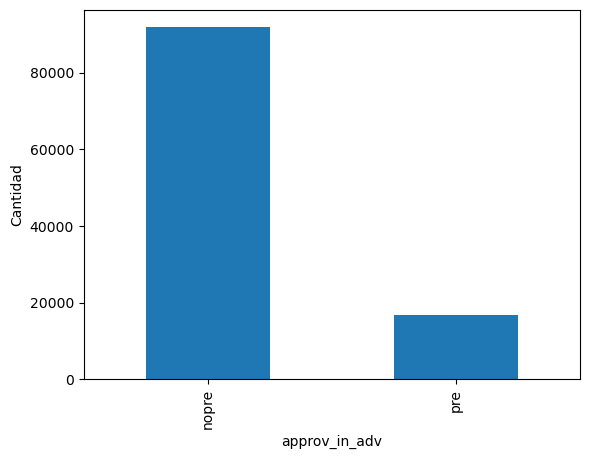

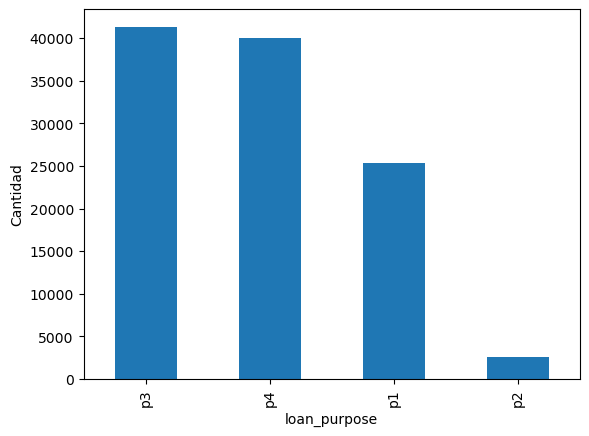

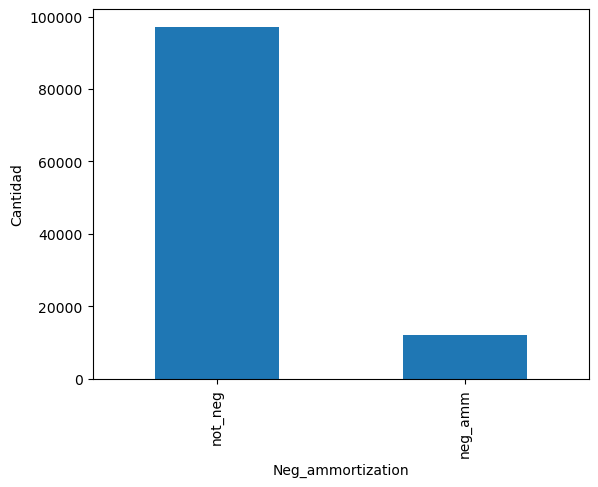

In [28]:
for columna in ['loan_limit', 'approv_in_adv','loan_purpose','Neg_ammortization']:
    dataset_cat_missing[columna].value_counts().plot.bar()
    plt.ylabel("Cantidad")
    plt.xlabel(columna)
    plt.show()

In [29]:

def plotCatColumn_vrs_Target(df, colname, target):
    categories = df[colname].unique()  
    categories = [category for category in categories if pd.notnull(category)]  
    colors = ['yellow', 'blue', 'green', 'red', 'orange', 'purple', 'pink', 'brown', 'gray', 'teal']  

    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    subset_missing = df[df[colname].isnull()]
    if not subset_missing.empty:  
        subset_missing[target].plot(kind="kde", color="black", label="Missings")

    for i, category in enumerate(categories):
        subset = df[df[colname] == category]
        subset[target].plot(kind="kde", color=colors[i], label=category)

    ax.legend()
    plt.title(f'{colname} vs {target}')
    plt.show()


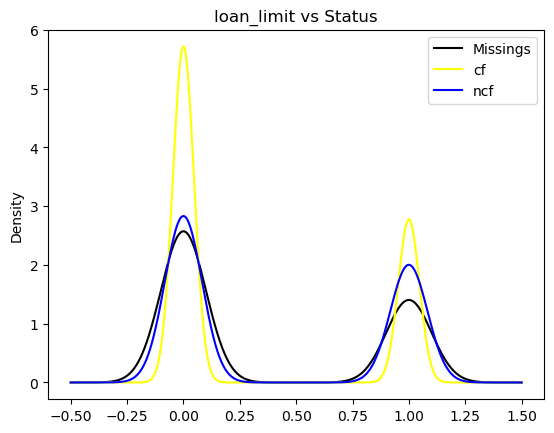

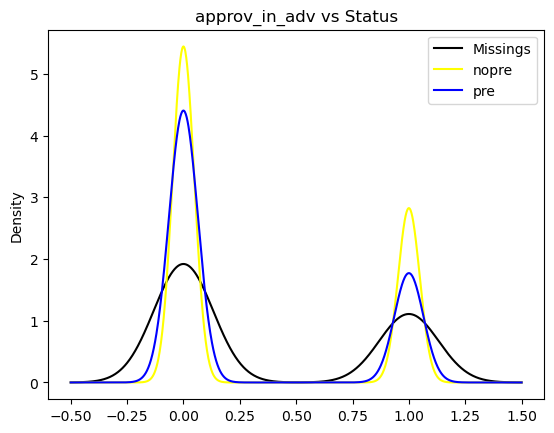

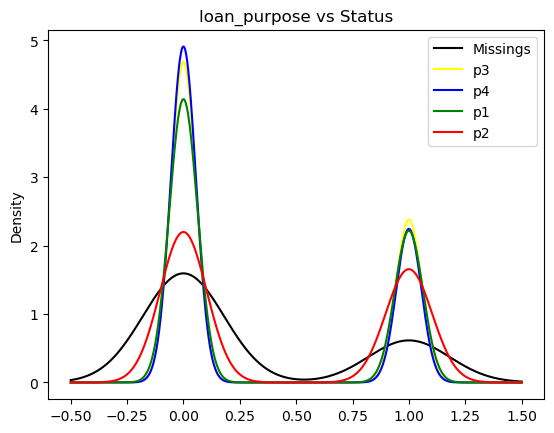

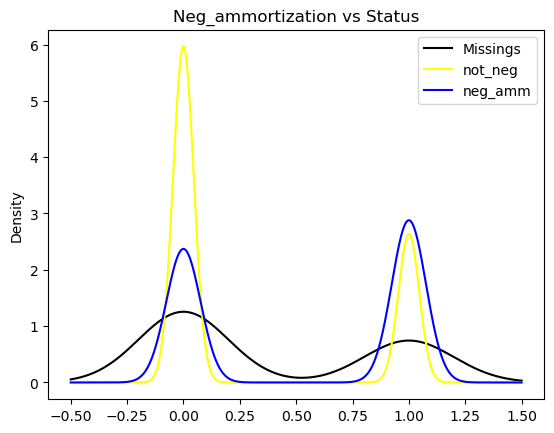

In [30]:
for catCol in  ['loan_limit', 'approv_in_adv', 'loan_purpose', 'Neg_ammortization']:
    plotCatColumn_vrs_Target(dataset_cat_missing, catCol, 'Status')

In [31]:
df['loan_limit'].fillna('ncf', inplace=True) 
df['approv_in_adv'].fillna('pre', inplace=True)
df['loan_purpose'].fillna('p2', inplace=True)
df['Neg_ammortization'].fillna('not_neg', inplace=True)

##### Verificación de la densidad despues de las imputaciones.

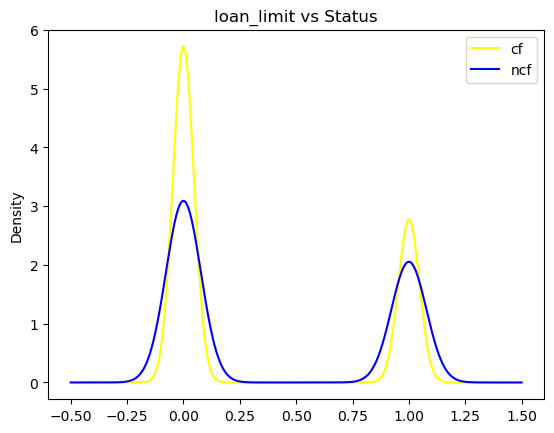

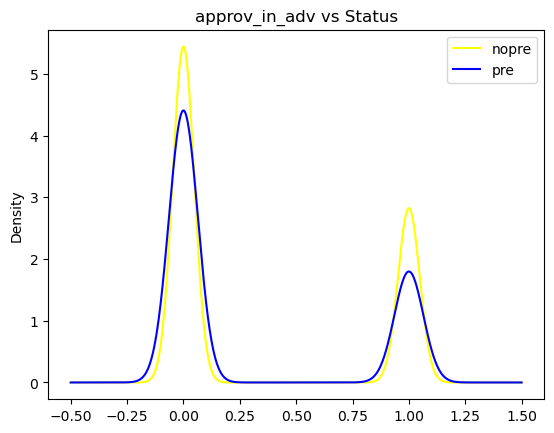

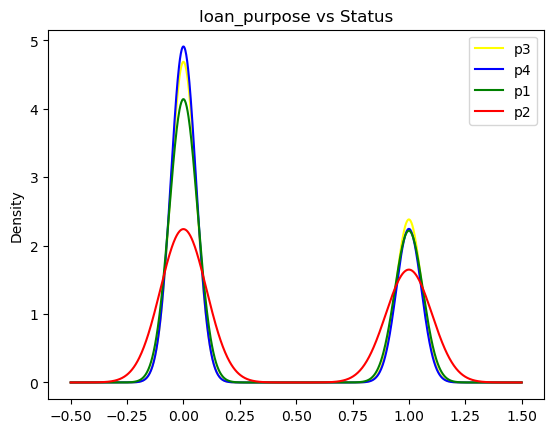

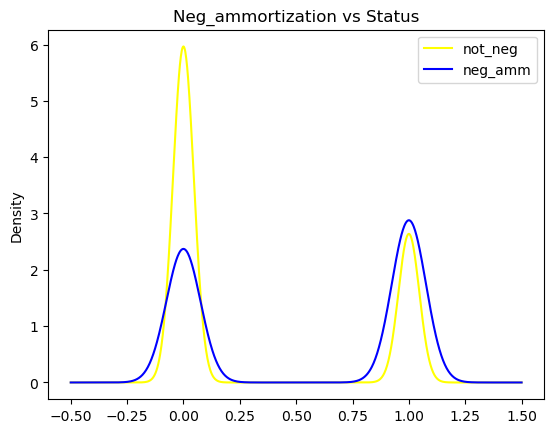

In [32]:
for catCol in  ['loan_limit', 'approv_in_adv', 'loan_purpose', 'Neg_ammortization']:
    plotCatColumn_vrs_Target(df, catCol, 'Status')

##### La modificación fue casi imperceptible, las gráficas mantienen su misma simetría.

In [33]:
Sobrevivientes = [col for col in df if (df[col].isnull().mean() <= 0.05)]
Sobrevivientes.remove('ID') #Identificador del caso
Sobrevivientes.remove('year') #Año todo es 2019
Sobrevivientes.remove('term') #La distribucion de los datos es la misma en el grafico de cajas.
Sobrevivientes.remove('Credit_Score') #La distribucion de los datos es la misma en el grafico de cajas.
Sobrevivientes


['loan_limit',
 'Gender',
 'approv_in_adv',
 'loan_type',
 'loan_purpose',
 'Credit_Worthiness',
 'open_credit',
 'business_or_commercial',
 'loan_amount',
 'Neg_ammortization',
 'interest_only',
 'lump_sum_payment',
 'construction_type',
 'occupancy_type',
 'Secured_by',
 'total_units',
 'credit_type',
 'co-applicant_credit_type',
 'age',
 'submission_of_application',
 'Region',
 'Security_Type',
 'Status']

##### 3.2 Codificación de Variables Categóricas

In [34]:
df[Sobrevivientes].dtypes


loan_limit                   object
Gender                       object
approv_in_adv                object
loan_type                    object
loan_purpose                 object
Credit_Worthiness            object
open_credit                  object
business_or_commercial       object
loan_amount                   int64
Neg_ammortization            object
interest_only                object
lump_sum_payment             object
construction_type            object
occupancy_type               object
Secured_by                   object
total_units                  object
credit_type                  object
co-applicant_credit_type     object
age                          object
submission_of_application    object
Region                       object
Security_Type                object
Status                        int64
dtype: object

In [35]:
codificar = Sobrevivientes
codificar.remove('loan_amount') #Continua
codificar.remove('Status') #Objetivo
codificar 

['loan_limit',
 'Gender',
 'approv_in_adv',
 'loan_type',
 'loan_purpose',
 'Credit_Worthiness',
 'open_credit',
 'business_or_commercial',
 'Neg_ammortization',
 'interest_only',
 'lump_sum_payment',
 'construction_type',
 'occupancy_type',
 'Secured_by',
 'total_units',
 'credit_type',
 'co-applicant_credit_type',
 'age',
 'submission_of_application',
 'Region',
 'Security_Type']

In [36]:
for catCol in codificar:
              freq_encoder_dict = df[catCol].value_counts().to_dict()
              df[catCol] = df[catCol].map(freq_encoder_dict)

In [57]:
Sobrevivientes = [col for col in df if (df[col].isnull().mean() <= 0.05)]
Sobrevivientes.remove('ID') #Identificador del caso
Sobrevivientes.remove('year') #Año todo es 2019
Sobrevivientes.remove('term') #La distribucion de los datos es la misma en el grafico de cajas.
Sobrevivientes.remove('Credit_Score') #La distribucion de los datos es la misma en el grafico de cajas.
Sobrevivientes

['loan_limit',
 'Gender',
 'approv_in_adv',
 'loan_type',
 'loan_purpose',
 'Credit_Worthiness',
 'open_credit',
 'business_or_commercial',
 'loan_amount',
 'Neg_ammortization',
 'interest_only',
 'lump_sum_payment',
 'construction_type',
 'occupancy_type',
 'Secured_by',
 'total_units',
 'credit_type',
 'co-applicant_credit_type',
 'age',
 'submission_of_application',
 'Region',
 'Security_Type',
 'Status']

In [58]:
df[Sobrevivientes].dtypes

loan_limit                     int64
Gender                         int64
approv_in_adv                  int64
loan_type                      int64
loan_purpose                   int64
Credit_Worthiness              int64
open_credit                    int64
business_or_commercial         int64
loan_amount                  float64
Neg_ammortization              int64
interest_only                  int64
lump_sum_payment               int64
construction_type              int64
occupancy_type                 int64
Secured_by                     int64
total_units                    int64
credit_type                    int64
co-applicant_credit_type       int64
age                            int64
submission_of_application      int64
Region                         int64
Security_Type                  int64
Status                         int64
dtype: object

In [39]:
df[Sobrevivientes]

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,Neg_ammortization,...,occupancy_type,Secured_by,total_units,credit_type,co-applicant_credit_type,age,submission_of_application,Region,Security_Type,Status
0,99265,28068,91807,82591,41333,104461,108905,93472,106500,97250,...,101439,109284,107634,15098,56220,23914,71907,47392,109284,1
1,99265,28068,91807,82591,41333,104461,108905,93472,536500,97250,...,101439,109284,107634,15098,56220,15319,71907,47392,109284,1
2,99265,28068,91807,82591,41333,104461,108905,93472,726500,97250,...,101439,109284,107634,15098,56220,5429,71907,47392,109284,1
3,99265,28068,91807,82591,41333,104461,108905,93472,176500,97250,...,101439,109284,107634,15098,56220,24293,71907,47392,109284,1
4,99265,28068,91807,82591,41333,104461,108905,93472,76500,97250,...,101439,109284,107634,15098,56220,15319,71907,47392,109284,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60993,10052,28068,91807,82591,41333,104461,108905,93472,576500,97250,...,101439,109284,107634,33924,53097,24293,71907,47392,109284,0
54338,99265,29710,91807,82591,40023,104461,108905,93472,576500,97250,...,101439,109284,107634,31048,56220,24293,37410,6552,109284,0
69755,99265,31485,91807,82591,41333,104461,108905,93472,236500,97250,...,101439,109284,107634,33924,53097,23914,71907,54445,109284,0
64436,99265,28068,91807,82591,40023,104461,108905,93472,156500,97250,...,101439,109284,107634,31048,53097,24293,37410,47392,109284,0


##### 3.3 Outliers

In [40]:
import scipy.stats as stats

In [41]:

def plotDistBoxQQ(dataset, col):
     '''
     Descripcion: Muestra las graficas de Distribución, Boxplot y QQ-Plot para detectar Outliers 
     Input: dataset-> pandas dataframe, col->string con nombre de columna
     output: visualiuzación de plots.
     '''
     plt.figure(figsize=(20, 6))
     plt.subplot(1, 3, 1)
     sns.distplot(dataset[col], bins=30)
     plt.title("Histograma y Densisdad")

     plt.subplot(1, 3, 2)
     sns.boxplot(y=dataset[col])
     plt.title("Boxplot")

     plt.subplot(1, 3, 3)
     stats.probplot(dataset[col], dist="norm", plot=plt)
     plt.title("Q-Q Plot")

C:\Users\DAVID\AppData\Local\Temp\ipykernel_8224\580665193.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[col], bins=30)


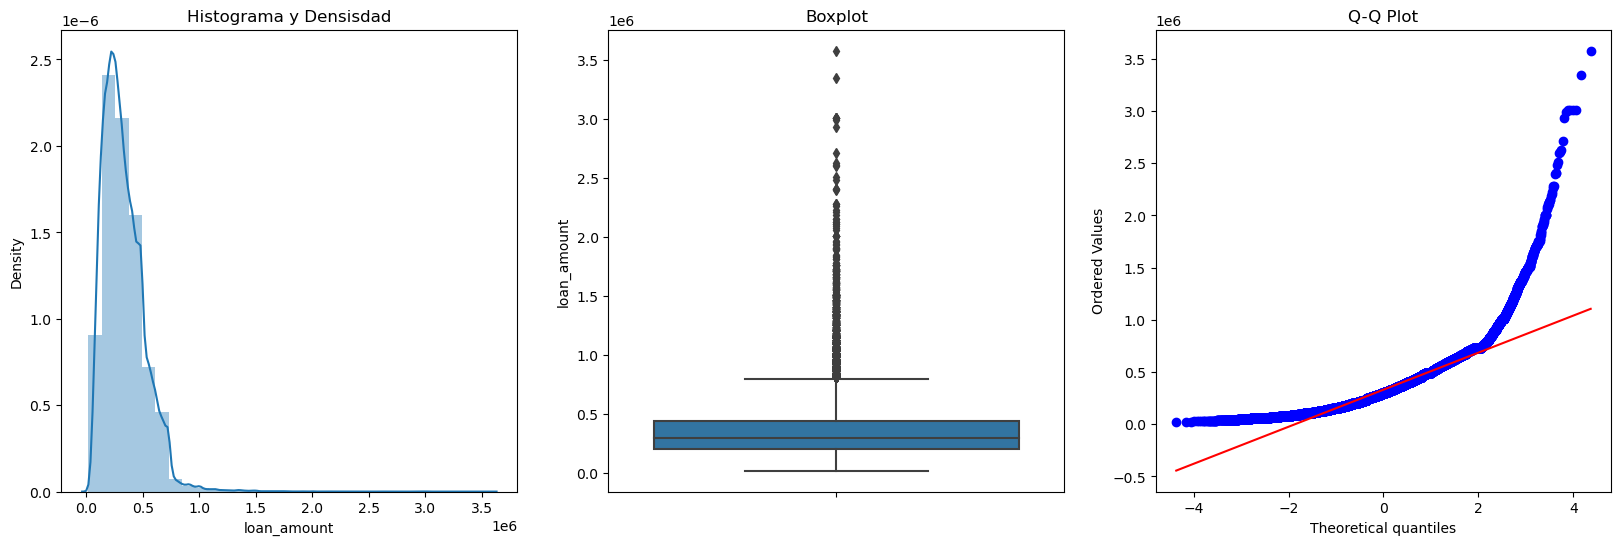

In [42]:
for col in ['loan_amount']:
     plotDistBoxQQ(df, col)

In [44]:
def detectOutliersLimits(dataset, col):
     '''
     Descripción: Calcula los limites superiores e inferiores para detección de outliers.
     Input: dataset-> pandas dataframe, col -> string nombre de columna
     Output: tupla de floats con los limites superior e inferior
     '''
     IQR = dataset[col].quantile(0.75) - dataset[col].quantile(0.25)
     LI =  dataset[col].quantile(0.25) - (IQR*1.75)
     LS = dataset[col].quantile(0.75) + (IQR*1.75)

     return LI, LS

In [59]:
LI, LS = detectOutliersLimits(df, 'loan_amount')
LI, LS

(-223500.0, 856500.0)

In [62]:
LI, LS = detectOutliersLimits(df, 'loan_amount')
df['loan_amount'] = np.where(df['loan_amount']  > LS, LS, 
                                                                       np.where(df['loan_amount']  < LI, LI, df['loan_amount'] ))

C:\Users\DAVID\AppData\Local\Temp\ipykernel_8224\580665193.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[col], bins=30)


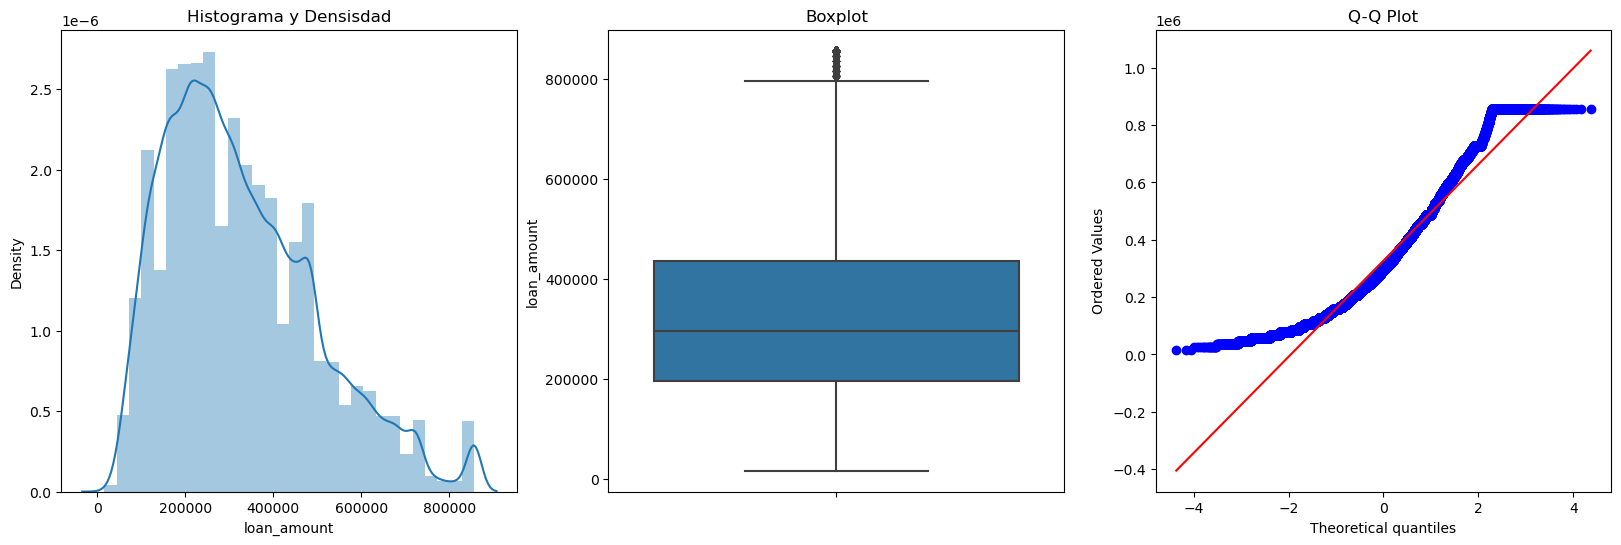

In [61]:
plotDistBoxQQ(df, 'loan_amount')

#### Con esta modificación nuestra variable queda con una mejor distribución. Y ofréceme mejores datos, el boxplot es mas entendible. 